# Critical Thinking [3]

<br>
Student ID: G210002697 <br>
Student Name: Abdullah Mohammad Albassam <br>
Course Code: DS560 <br>
Course Name: Advanced Data Mining <br>

•	Twitter US Airline Sentiment Dataset: 
https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?select=Tweets.csv

*   It contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:




*   The information of main attributes:


> 1.   alirline_sentiment : Sentiment classification.(positivie, neutral, and negative)

> 2.   negativereason : Reason selected for the negative opinion

> 3.   airline : Name of 6 US Airlines('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')

> 4.   text : Customer's opinion

In [2]:
import pandas as pd   #using pandas libaray to handel and deal with our dataset.

#using read_csv() function to read the dataset
dataFrame = pd.read_csv('/content/Tweets.csv')

In [3]:
#showing the first 5 records
dataFrame.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#how many records?
nRow, nCol = dataFrame.shape 
print(f'There are {nRow} rows and {nCol} columns in the dataset')

There are 9155 rows and 15 columns in the dataset


In [5]:
dataFrame.info()  #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9155 entries, 0 to 9154
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      9155 non-null   int64  
 1   airline_sentiment             9155 non-null   object 
 2   airline_sentiment_confidence  9155 non-null   float64
 3   negativereason                5084 non-null   object 
 4   negativereason_confidence     6007 non-null   float64
 5   airline                       9155 non-null   object 
 6   airline_sentiment_gold        21 non-null     object 
 7   name                          9155 non-null   object 
 8   negativereason_gold           17 non-null     object 
 9   retweet_count                 9155 non-null   int64  
 10  text                          9155 non-null   object 
 11  tweet_coord                   689 non-null    object 
 12  tweet_created                 9154 non-null   object 
 13  twe

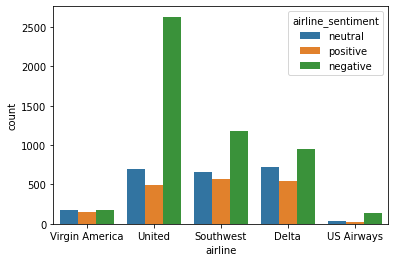

In [6]:
import seaborn as sns

sns.countplot(data = dataFrame, x ="airline", hue = "airline_sentiment")

In [7]:
#number of missing values in each column
dataFrame.isnull().sum()  

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4071
negativereason_confidence       3148
airline                            0
airline_sentiment_gold          9134
name                               0
negativereason_gold             9138
retweet_count                      0
text                               0
tweet_coord                     8466
tweet_created                      1
tweet_location                  2845
user_timezone                   2857
dtype: int64

In [8]:
#we need just 2 columns which have tweets and id: tweet_id,text, so we will create a new dataframe 
df_sent = dataFrame[['tweet_id','text']]
df_sent

,tweet_id,text
0,570306133677760513,@VirginAmerica What @dhepburn said.
1,570301130888122368,@VirginAmerica plus you've added commercials t...
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,@VirginAmerica and it's a really big bad thing...
...,...,...
9150,570109961511895040,@USAirways is utterly unreliable! They didn't ...
9151,570109219078152193,@USAirways yes but again valuable time has bee...
9152,570108987284197376,@USAirways I don't like being lied to. No bad ...
9153,570108377029685248,@USAirways yes it landed at 11:40am. Should no...


In [9]:
#adding a new column which will contain the associated sentiment
import numpy as np
df_sent.insert(2,"sentiment",np.nan)

In [10]:
df_sent.head(3)

,tweet_id,text,sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,NaN
1,570301130888122368,@VirginAmerica plus you've added commercials t...,NaN
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,NaN


**Cleaning tweets**

In [11]:
#1- remove any mentions like : @VirginAmerica

df_sent["text"] = df_sent["text"].str.replace("(@+\w+)", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df_sent.head(3)

,tweet_id,text,sentiment
0,570306133677760513,What said.,NaN
1,570301130888122368,plus you've added commercials to the experien...,NaN
2,570301083672813571,I didn't today... Must mean I need to take an...,NaN


In [13]:
import re
import string   
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [14]:
#2- create a new method called: cleanTweets to cleaning text :Removing Stopwords, Tokenize, Remove Puncs, Lemmatization

def cleanTweets(texts):
    
    #1. Tokenize
    text_tokens = word_tokenize(texts.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words] 
    
    #4. Lemmatization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)


In [15]:
df_sent["text"] = df_sent["text"].apply(cleanTweets)
df_sent.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,text,sentiment
0,570306133677760513,said,NaN
1,570301130888122368,plus youve added commercial experience tacky,NaN
2,570301083672813571,didnt today must mean need take another trip,NaN
3,570301031407624196,really aggressive blast obnoxious entertainmen...,NaN
4,570300817074462722,really big bad thing,NaN


**Applying Sentiment**

In [17]:
# create a new method to apply sentiment
from textblob import Sentence


def sentiment(tweets):
  
  score = Sentence(tweets).sentiment[0]

  if score == 0:  return 'Neutral'
  if score > 0: return 'Positive'
  return 'Negative'

In [19]:
df_sent["sentiment"] = df_sent["text"].apply(sentiment)
df_sent.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet_id,text,sentiment
0,570306133677760513,said,Neutral
1,570301130888122368,plus youve added commercial experience tacky,Neutral
2,570301083672813571,didnt today must mean need take another trip,Negative
3,570301031407624196,really aggressive blast obnoxious entertainmen...,Positive
4,570300817074462722,really big bad thing,Negative
5,570300767074181121,seriously would pay flight seat didnt playing ...,Negative
6,570300616901320704,yes nearly every time fly vx ear worm go away,Positive
7,570300248553349120,really missed prime opportunity men without ha...,Positive
8,570299953286942721,well,Neutral
9,570295459631263746,amazing arrived hour early youre good,Positive


<a id='ref'></a>
#### **References**
[1] Deitel, P. J., & Deitel, H. (2020). Intro to python for computer science and data science: Learning to program with AI, Big Data and The Cloud. Pearson.</br>
[2] Madhavan, S. (2015). Mastering Python for data science explore the world of data science through Python and learn how to make sense of data. Birmingham: Packt Publ.